In [1]:
import csv
import pandas as pd
from load_clean_review import load_and_clean_reviews

PATH = "data/Digital_Music.tsv"

df = load_and_clean_reviews(PATH)


In [2]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,10293599,R14LVB34Z2Z53I,B000YMOQZY,262935067,Knockin' On Heaven's Door,Digital_Music_Purchase,5,0,0,False,True,favorites,Great rendition. Great song,2015-08-31
1,US,6087195,R2M0R9CWPC82LT,B00ISAEC80,452318038,Flawless,Digital_Music_Purchase,5,0,0,False,True,Five Stars,A good music to listen.,2015-08-31
2,US,33717063,RQNQI2R3BM52A,B00VBB6AVU,675969129,Scandal of Grace,Digital_Music_Purchase,4,0,0,False,True,Good,Not as good as the original but I needed to he...,2015-08-31
3,US,14948020,RTUIX1135HUAB,B008A5POJO,282925893,I Surrender (Live),Digital_Music_Purchase,5,0,0,False,True,Wonderful lyrics! Makes you feel like praying,Time to worship and surrender with this song. ...,2015-08-31
4,US,21694522,RE3QSAT8TL010,B014CW2RN4,109077793,We Are Young (Jersey Club),Digital_Music_Purchase,4,0,0,False,True,Hot remix but took short,So this should be longer....but love this song:),2015-08-31


In [3]:
min_date = df["review_date"].min()
max_date = df["review_date"].max()

print("Earliest review:", min_date)
print("Latest review:", max_date)



# Extract year and month as separate columns
df["year"] = df["review_date"].dt.year
df["month"] = df["review_date"].dt.month

# Group by year and collect unique months
months_per_year = df.groupby("year")["month"].unique()

print(months_per_year)

print(months_per_year.loc[2012.0])

Earliest review: 2000-06-28 00:00:00
Latest review: 2015-08-31 00:00:00
year
2000.0                                     [12.0, 8.0, 6.0]
2001.0                                          [11.0, 7.0]
2002.0                                    [12.0, 11.0, 6.0]
2003.0                           [11.0, 8.0, 7.0, 4.0, 3.0]
2004.0                          [11.0, 10.0, 5.0, 4.0, 1.0]
2005.0                    [12.0, 11.0, 10.0, 7.0, 5.0, 4.0]
2006.0          [12.0, 11.0, 10.0, 7.0, 6.0, 3.0, 2.0, 1.0]
2007.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 3....
2008.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2009.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2010.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2011.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2012.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2013.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2014.0    [12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4....
2015.0             [8.0

In [4]:

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012


df_2012["review_length"] = df_2012["review_body"].fillna("").str.split().str.len()
df_2012 = df_2012[df_2012["review_length"] > 0]

df_2012["length_bin"] = pd.qcut(
    df_2012["review_length"], q=3, labels=["short", "medium", "long"], duplicates="drop"
)

df_2012

target_n = 4000
labels = ["short", "medium", "long"]

per = target_n // len(labels)   # base quota per bucket (≈ 1333)
rem = target_n - per * len(labels)   # leftover rows to distribute


parts = []
for i, label in enumerate(labels):
    want = per + (1 if i < rem else 0)  # bucket-specific quota
    have = (df_2012["length_bin"] == label).sum()  # how many rows exist in that bucket
    take = min(want, have)  # don’t over-ask if bucket is too small
    if take > 0:
        parts.append(
            df_2012[df_2012["length_bin"] == label].sample(n=take, random_state=42)
        )

sampled_df = pd.concat(parts)

sampled_df

shuffled_df = (
    sampled_df
      .sample(frac=1, random_state=42)  
      .reset_index(drop=True)          
)

shuffled_df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,16258799,R196XCYNHTGEK7,B00A93WK2O,923049750,Table Scraps [Explicit],Digital_Music_Purchase,5,0,0,False,False,Kathy,Real great hip hop music!! Sound is really go...,2012-11-24,2012.0,11.0,26,short
1,US,43527238,R1ZZGS36GDO1BH,B0044CXDEU,408294049,Back In The Day (Re-Recorded / Remastered),Digital_Music_Purchase,3,0,0,False,True,It's hard to remix a song you got right the fi...,I both grew up an listened to this legendary j...,2012-12-08,2012.0,12.0,84,long
2,US,16011178,RVVB6AKHQ1OQK,B001CJXXM0,790396759,Alice's Restaurant Massacree,Digital_Music_Purchase,5,0,0,False,True,Classic,It's just not Thanksgiving without this at lea...,2012-12-25,2012.0,12.0,24,short
3,US,51053530,R3D5KYXYAHKDWZ,B0043WEF0M,168056528,Bad Things (Theme from 'True Blood'),Digital_Music_Purchase,5,0,0,False,True,Can't get enough,I've listened to this song dozens of times as ...,2012-09-10,2012.0,9.0,95,long
4,US,25851828,RF3J30GYBI5WU,B00535RYFQ,518013233,Blow Me Away - Featuring Valora [feat. Valora],Digital_Music_Purchase,1,1,2,False,False,Horrible,Pissed does not even begin to describe how I f...,2012-02-17,2012.0,2.0,68,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,34790096,R3V00A3MQS7FLS,B0088V1E7Q,401042197,Batman,Digital_Music_Purchase,5,1,1,False,False,A link to Link.,Nice job Toruga. Very faithful to the origina...,2012-08-08,2012.0,8.0,22,short
3996,US,30016550,R2NU3Y30GBIIU2,B009FOCJK6,324963293,Gold Dust,Digital_Music_Purchase,5,2,6,False,False,Old is new again.,What a great experience. I recommend this to a...,2012-10-28,2012.0,10.0,23,short
3997,US,12141110,RYS4X5UI779O,B00453YDKG,663455005,Singable Songs For The Very Young,Digital_Music_Purchase,5,0,0,False,True,Classic,I grew up with Raffi and wanted my son to grow...,2012-11-03,2012.0,11.0,25,short
3998,US,50765411,RVVT6OR8AFIUA,B003PUBBLY,445842870,The White Album,Digital_Music_Purchase,4,0,0,False,False,More of a 4.5,"This album onely has one fault, that is A Born...",2012-12-07,2012.0,12.0,69,long


In [6]:
# Recreate qcut but keep the Interval objects
bins = pd.qcut(df_2012["review_length"], q=3, duplicates="drop")

# Look at unique intervals
print(bins.cat.categories)

IntervalIndex([(0.999, 26.0], (26.0, 46.0], (46.0, 6848.0]], dtype='interval[float64, right]')


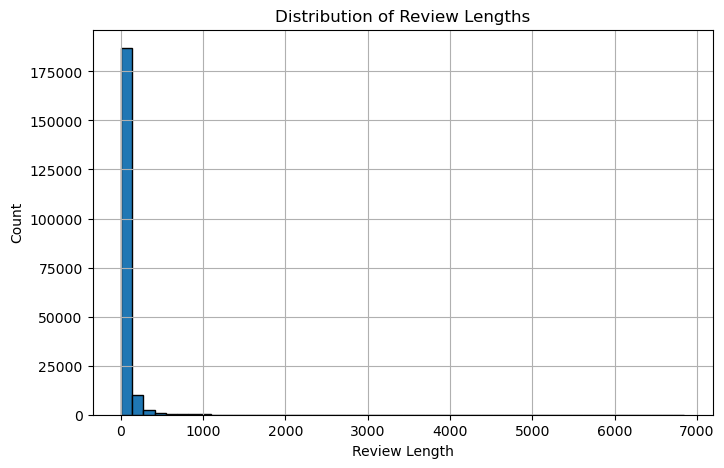

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_2012["review_length"].hist(bins=50, edgecolor="black")
plt.xlabel("Review Length")
plt.ylabel("Count")
plt.title("Distribution of Review Lengths")
plt.show()

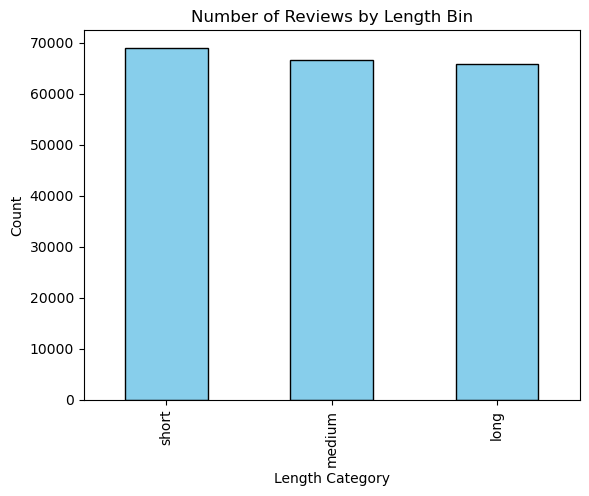

In [8]:
df_2012["length_bin"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Length Category")
plt.ylabel("Count")
plt.title("Number of Reviews by Length Bin")
plt.show()

In [10]:
from month_bin_shuffle import add_length_info, stratified_sample_by_month_and_bin

df_2012 = df[df["review_date"].dt.year == 2012].copy()

df_2012

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month
1324913,US,26297975,R176H0USVGXRQG,B001MCYAUQ,46470885,Oh How Precious,Digital_Music_Purchase,5,0,0,False,True,Precious is His name!,This song really gives me peace. Just saying ...,2012-12-31,2012.0,12.0
1324914,US,37517497,R3C4TDH5COK5LY,B002ECLSQC,10296667,Kinderlieder (Klassiker für Kinder),Digital_Music_Purchase,5,1,1,False,False,Excellent,This is a wonderful CD with great music for ch...,2012-12-31,2012.0,12.0
1324915,US,49594528,R2ZU7D88FGPX82,B001KQKAUS,139245011,"Defying Gravity (From ""Wicked"" Original Broadw...",Digital_Music_Purchase,4,1,1,False,False,Trying to recapture a moment...,I just saw Wicked after so long - I had no ide...,2012-12-31,2012.0,12.0
1324916,US,24712702,R3KJLNY3H254U9,B0053ZFOYE,708102292,"10,000 Reasons (Bless the Lord)",Digital_Music_Purchase,5,0,0,False,True,Great song,This song inspired me to take Ann Voskamp's 10...,2012-12-31,2012.0,12.0
1324917,US,13054860,R30N3IV3HDYD0P,B006LWT3FO,717736686,This Have I Done for My True Love,Digital_Music_Purchase,5,0,0,False,True,Among the best,Chanticleer are perennial favorites for both e...,2012-12-31,2012.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526273,US,49651954,RXJ68PTCK3MR5,B004QNOMG0,373037407,Stairwells (Amazon MP3 Exclusive Version),Digital_Music_Purchase,3,3,8,False,True,"Nice music, but not 5-star quality",I suppose that in these days of grade inflatio...,2012-01-01,2012.0,1.0
1526274,US,50131069,R3ED2WJ76AYU9L,B006M4HWP4,932389240,Better Than I Know Myself,Digital_Music_Purchase,5,0,0,False,False,Adam Lambert,Adam has produced a winner. Hope it gets inten...,2012-01-01,2012.0,1.0
1526275,US,28799720,R3HIFJ3Z4GDRAV,B001TOA0AG,190099268,Nothing More Than Light,Digital_Music_Purchase,4,0,0,False,False,rock with a social conscience,Conspiracy Of Thought is an industrial hard ro...,2012-01-01,2012.0,1.0
1526276,US,46005895,R1PCBZW8DSPN3J,B0014DI7A2,894516985,Sounds Of Light - The Pure Tones Of Crystal Si...,Digital_Music_Purchase,5,3,3,False,True,Rule 1: Must use headphones; Rules 2: open min...,A friend of mine recommended this crystal bowl...,2012-01-01,2012.0,1.0


In [13]:
df_2012 = add_length_info(df_2012)
df_2012 = stratified_sample_by_month_and_bin(df_2012, target_n=4000)


In [14]:
df_2012

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,year,month,review_length,length_bin
0,US,52496677,R1RHTGGZMYAH2Y,B002VQ23AG,400330899,"Brahms, J. / Strauss, R. / Herzogenberg, H.: C...",Digital_Music_Purchase,5,1,1,False,False,Johannes Moser Continues his survey of Brahms ...,Johannes Moser continues his successful foray ...,2012-02-17,2012.0,2012-02,362,long
1,US,46707532,R23WEYK28ZEF4P,B0050VI69G,70822140,Pumped Up Kicks,Digital_Music_Purchase,4,0,0,False,False,"Great tune, weird lyrics",Pumped up kicks has a really nice tune. Shure ...,2012-11-04,2012.0,2012-11,68,medium
2,US,53068061,R17FAB2JSQHIGL,B005GRUOHG,737519878,Detoxing,Digital_Music_Purchase,3,0,0,False,False,Detoxing - this is a good thing !,Norway has always had it's share of highly ski...,2012-02-29,2012.0,2012-02,295,long
3,US,13232448,R2IQ8G3C02ZIWM,B004FCEFUK,275286673,The Great Escape,Digital_Music_Purchase,4,3,4,False,True,Amazing album marred by a few cheesy tracks,Seventh Wonder is a progressive power metal ba...,2012-12-18,2012.0,2012-12,521,extra_long
4,US,36129886,R3GHM0W5QL5ZF9,B009DP9D6A,546585055,> album title goes here < [Explicit],Digital_Music_Purchase,4,3,4,False,False,"How do you like your ""coffee""...??",The album is not as poor as some of the review...,2012-09-30,2012.0,2012-09,895,extra_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,US,15555753,R2N8H3GXZQ9QZ2,B00599CIOI,32615448,Grasp What Is Good,Digital_Music_Purchase,5,0,0,False,False,A hidden gem,That this album hasn't received a lot more att...,2012-04-20,2012.0,2012-04,68,medium
3996,US,13162634,R1PCJ8KOXF441I,B007O3RFOA,827372791,From Age to Age,Digital_Music_Purchase,5,4,4,False,False,Immovable our hope remains...,Every day we live we breathe in the air of a f...,2012-04-17,2012.0,2012-04,610,extra_long
3997,US,35669827,R2N3NFA8TSLIYW,B005I8CJ5S,973577437,You Are All I See,Digital_Music_Purchase,5,0,0,False,False,"Lovely, light ivy...",YOU ARE ALL I SEE is whispery goodness the who...,2012-03-28,2012.0,2012-03,285,long
3998,US,31012703,R25SZ3S6TTNAOA,B00994CYWU,316923330,Snake Charmer - Single,Digital_Music_Purchase,5,0,0,False,False,Jessica Lowndes - Real Life Charmer,"Ever since watching 90210, Jessica Lowndes bec...",2012-11-15,2012.0,2012-11,222,long


In [ ]:
LENGTH_BINS = [0, 50, 200, 500, float("inf")]
LENGTH_LABELS = ["short", "medium", "long", "extra_long"]
# --- Check bin ranges ---
for label, (low, high) in zip(LENGTH_LABELS, zip(LENGTH_BINS[:-1], LENGTH_BINS[1:])):
    upper = int(high) if high != float("inf") else "∞"
    print(f"{label:>10}: {low+1} – {upper} words")

# --- Count per (month × length_bin) ---
counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)

print("\nCounts per (month × length_bin):")
print(counts)

# optional: quick totals per bin
print("\nTotals per bin:")
print(counts.sum(axis=0))

# optional: quick totals per month
print("\nTotals per month:")
print(counts.sum(axis=1))

     short: 1 – 50 words
    medium: 51 – 200 words
      long: 201 – 500 words
extra_long: 501 – ∞ words

Counts per (month × length_bin):
length_bin  short  medium  long  extra_long
month                                      
2012-01        84      84    84          84
2012-02        84      84    84          84
2012-03        84      84    84          84
2012-04        84      84    84          84
2012-05        83      83    83          83
2012-06        83      83    83          83
2012-07        83      83    83          83
2012-08        83      83    83          83
2012-09        83      83    83          83
2012-10        83      83    83          83
2012-11        83      83    83          83
2012-12        83      83    83          83

Totals per bin:
length_bin
short         1000
medium        1000
long          1000
extra_long    1000
dtype: int64

Totals per month:
month
2012-01    336
2012-02    336
2012-03    336
2012-04    336
2012-05    332
2012-06    332
2012-07    3

/var/folders/zm/pz0q6_fn2zv0lr2bzbh6_8mc0000gn/T/ipykernel_22601/1777719214.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_2012.groupby(["month", "length_bin"]).size().unstack(fill_value=0)


In [16]:
df_2012.to_csv("music_2012.csv", index=False)